## REGRESSÃO LINEAR


In [1]:
#Importando Blibliotecas

In [2]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de dados
import pandas as pd
import numpy as np
import os # accessing directory structure

#LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import MinMaxScaler

In [4]:
#Carregar o csv para Dataframe
df = pd.read_csv('housing.csv')

### Análise Exploratória dos Dados

In [5]:
# Total de linhas e colunas
df.shape

(20640, 10)

In [6]:
#Primeiras linhas 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Amostra aleatória
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,114800.0,NEAR BAY
17227,-119.74,34.44,27.0,1251.0,282.0,503.0,283.0,2.8000,353000.0,NEAR OCEAN
7240,-118.11,34.01,41.0,815.0,252.0,775.0,231.0,2.2847,190000.0,<1H OCEAN
1329,-121.88,38.00,16.0,2605.0,440.0,1352.0,408.0,4.1947,140300.0,INLAND
18081,-122.03,37.27,25.0,4460.0,553.0,1608.0,561.0,10.7958,500001.0,<1H OCEAN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#Lista de itens da variavél dammy
print(df['ocean_proximity'].unique())
x=df['ocean_proximity'].unique()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [10]:
#Percentual de cada categoria
df['ocean_proximity'].value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

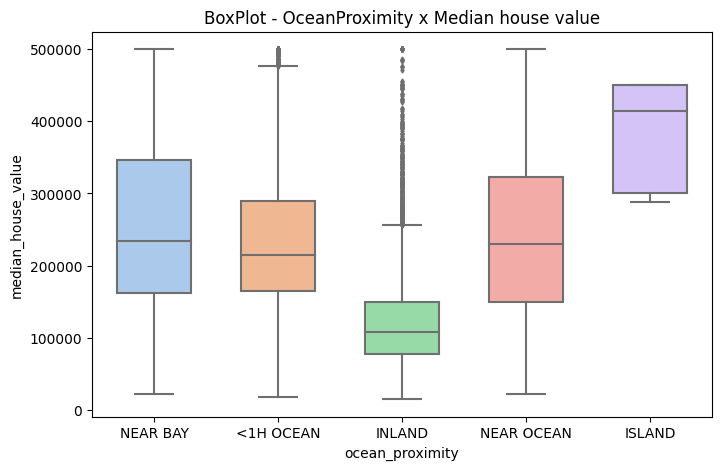

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('BoxPlot')
sns.set_palette("pastel")
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, width=0.6, fliersize=2.5)
plt.title('BoxPlot - OceanProximity x Median house value'); plt.show()


### TRANSFORMANDO CATEGORIAS EM VALORES

In [ ]:
#df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN',2).replace('INLAND',3).replace('NEAR OCEAN',4).replace('NEAR BAY',1).replace('ISLAND',0)

In [33]:
#Ajuste das variáveis categóricas para valores 0 e 1
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix=['ocean'])

### VERIFICAÇÃO DE DADOS FALTANTES

In [34]:
print('TOTAL Null\n')
print(df.isnull().sum(),'\n')
print('TOTAL NA\n')
print(df.isna().sum(),)

TOTAL Null

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_<1H OCEAN         0
ocean_INLAND            0
ocean_ISLAND            0
ocean_NEAR BAY          0
ocean_NEAR OCEAN        0
dtype: int64 

TOTAL NA

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_<1H OCEAN         0
ocean_INLAND            0
ocean_ISLAND            0
ocean_NEAR BAY          0
ocean_NEAR OCEAN        0
dtype: int64


In [35]:
#AJUSTE DOS DADOS FALTANTES, RETIRADA DOS DADOS
df = df.dropna()
df.shape

(20433, 14)

### HISTOGRAMA: Avaliação da normalidade dos dados

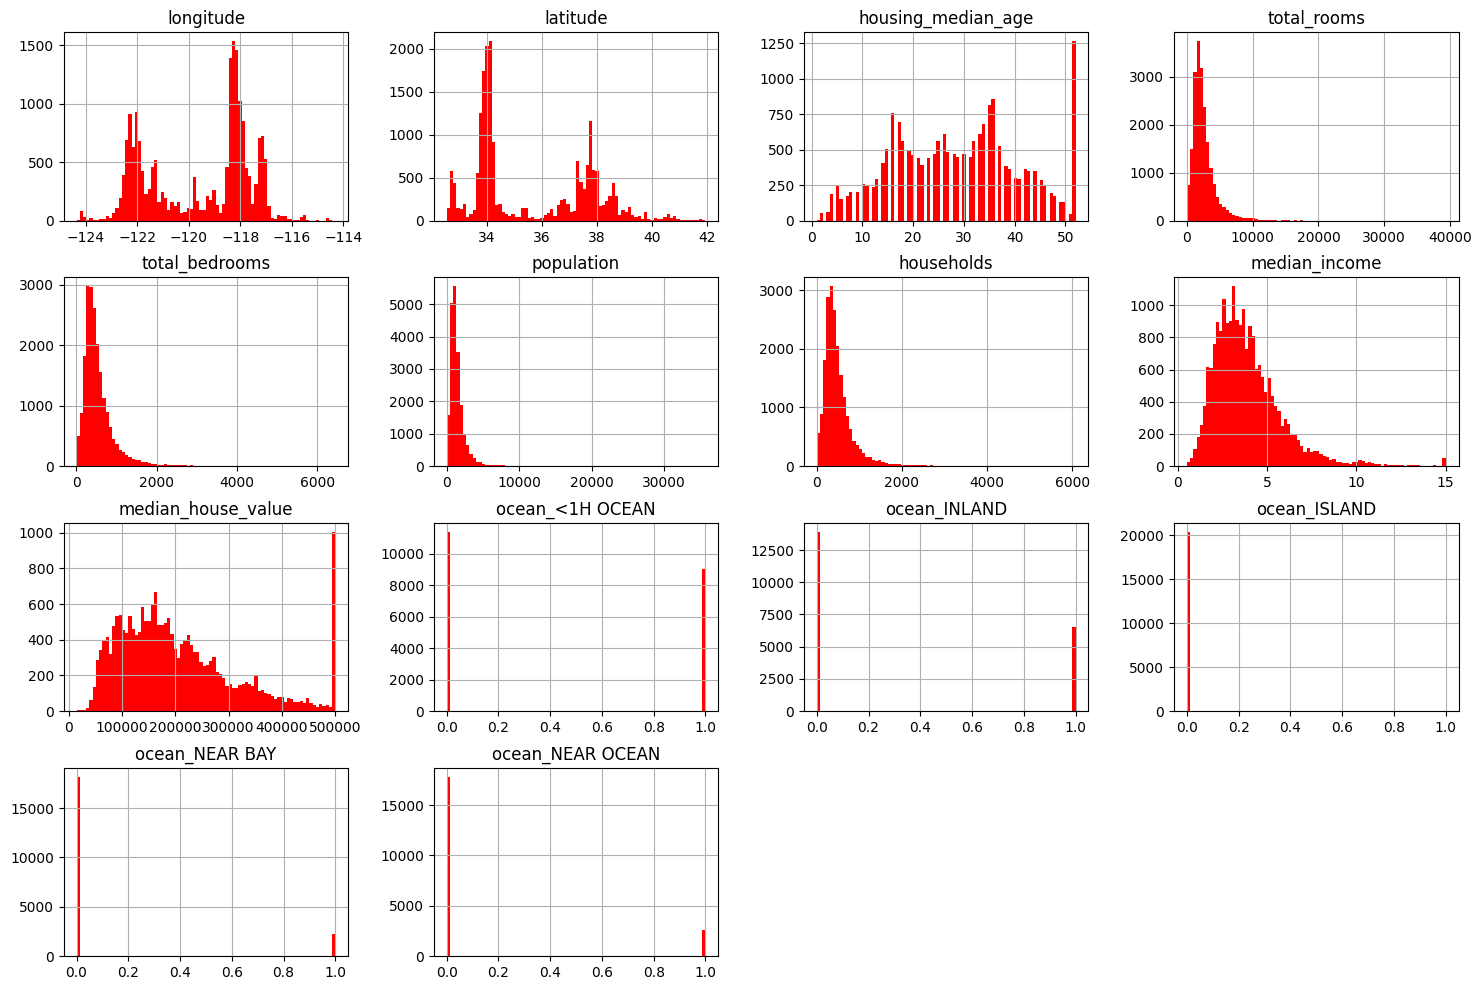

In [36]:
df.hist(bins=80, figsize=(18,12),color="red"); plt.show()

#### NORMALIZAR OS DADOS

In [37]:
#NORMALIZAR AS COLUNAS PARA VALORES LOG
df['total_rooms'] = np.log2(df['total_rooms'])
df['population'] = np.log2(df['population'])
df['total_bedrooms'] = np.log2(df['total_bedrooms'])
df['thouseholds'] = np.log2(df['households'])

#### RESULTADO DO AJUSTE NO HISTOGRAMA

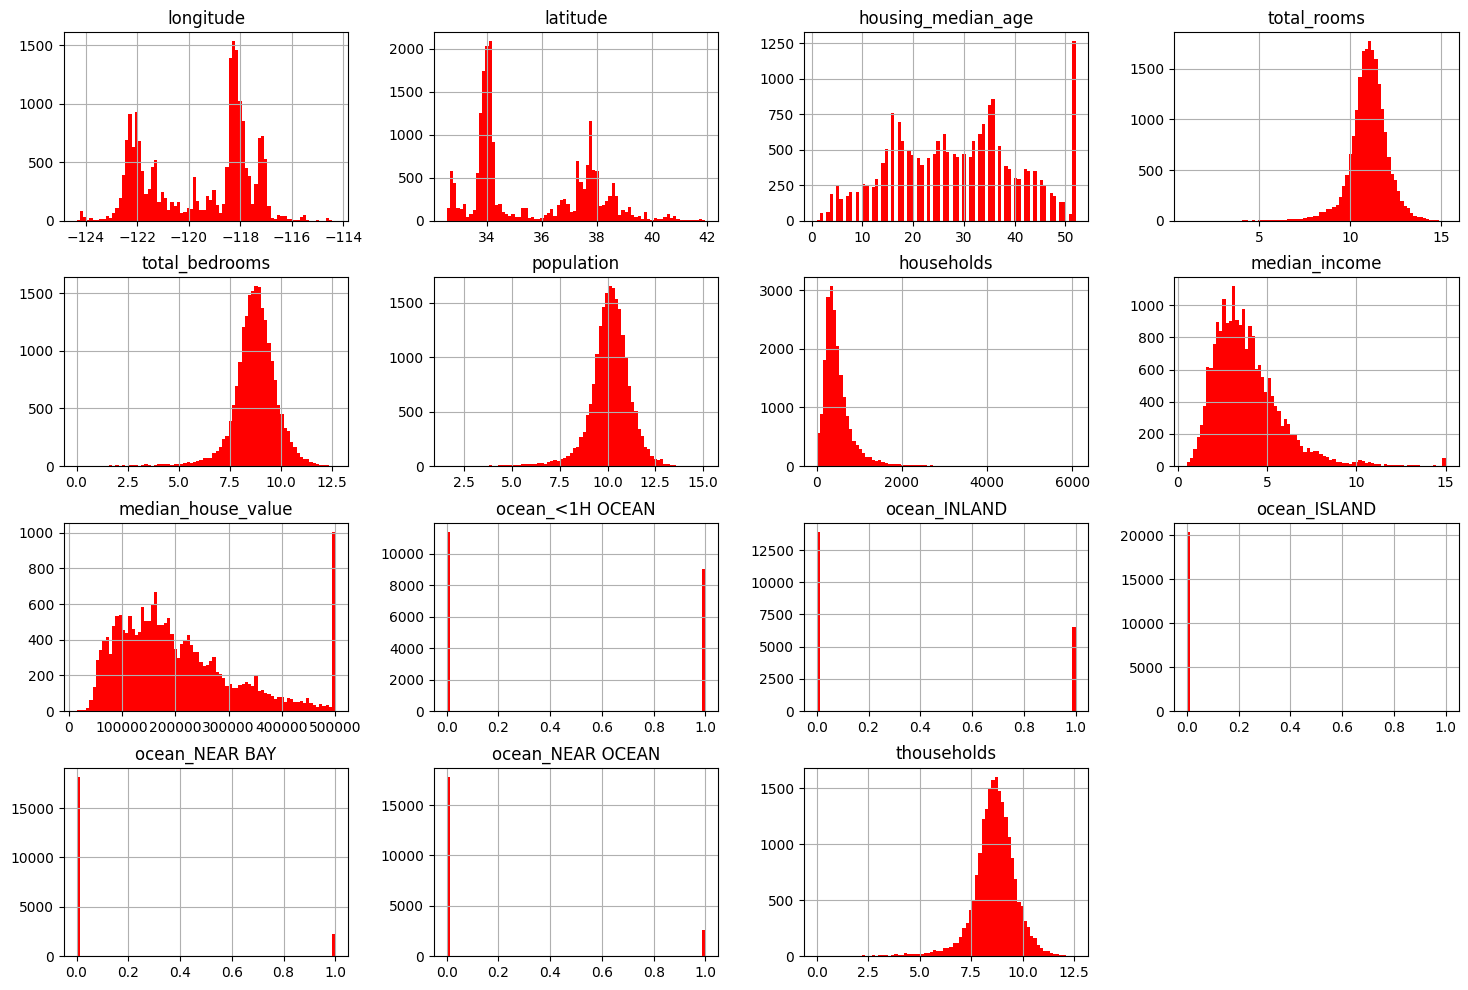

In [38]:
#AVALIAÇÃO
df.hist(bins=80, figsize=(18,12),color="red"); plt.show()

### VERIFICAÇÃO DE OUTLIERS

In [39]:
#Total de casa com valor médio acima de 500.000
print((df['median_house_value']>=500000).sum())

985


In [40]:
#Total
print((df['housing_median_age']>=50).sum())

1447


In [41]:
(df['total_rooms']<6).sum()

83

In [42]:
#removendo valores acima de 500.000
#df = df.loc[df['median_house_value']<500000]

In [43]:
#df.shape

Neste estudo não foram retirados os outliers.

### ENRIQUECIMENTO DOS DADOS 

In [44]:
#Colunas Novas
df["perc_bedrooms_rooms"] = df["total_bedrooms"] / df["total_rooms"]
df["perc_households_rooms"] = df["total_rooms"] / df["households"]
df['coordinate'] = df['longitude'] + df['latitude']

### CORRELAÇÃO ENTRE AS VARIÁVEIS

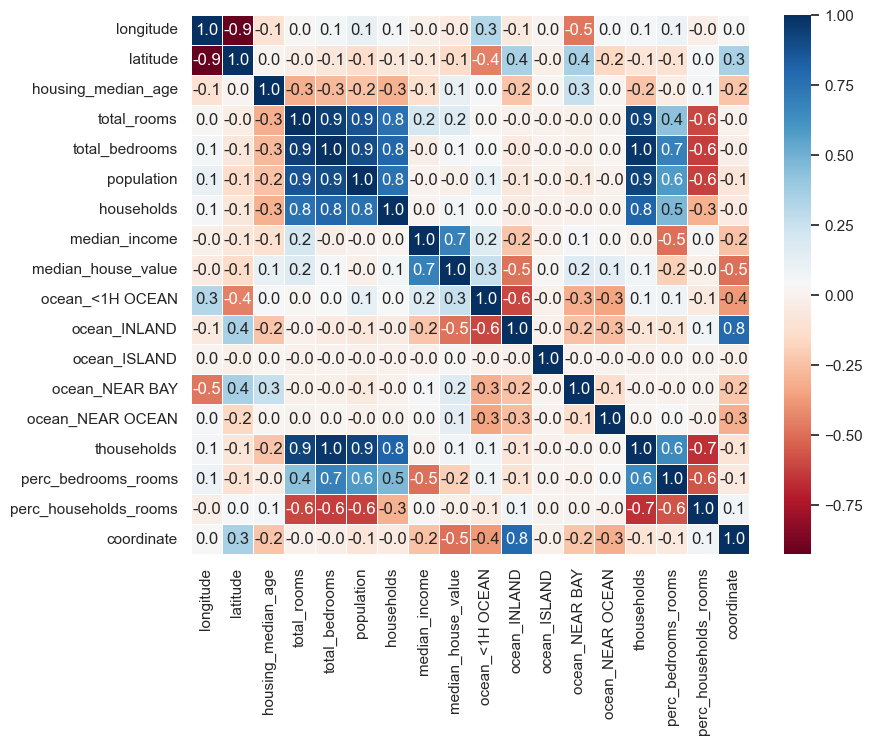

In [45]:
# Matriz de correlação
plt.figure(figsize=(9,7))
sns.set_theme()
sns.heatmap(df.corr(), annot=True, fmt=".1f",linewidth=.5 ,cmap="RdBu");plt.show()

In [46]:
# Correlação entre as variáveis e a váriavel alvo
df.corr()["median_house_value"].sort_values(ascending = False)

median_house_value       1.000000
median_income            0.688355
ocean_<1H OCEAN          0.257614
ocean_NEAR BAY           0.160526
total_rooms              0.158311
ocean_NEAR OCEAN         0.140378
housing_median_age       0.106432
thouseholds              0.072329
households               0.064894
total_bedrooms           0.052926
ocean_ISLAND             0.023525
perc_households_rooms   -0.016397
population              -0.021856
longitude               -0.045398
latitude                -0.144638
perc_bedrooms_rooms     -0.191640
ocean_INLAND            -0.484787
coordinate              -0.491210
Name: median_house_value, dtype: float64

### CRIANDO MODELOS REGRESSÃO LINEAR

#### Separação dos dados em Treino e Teste

In [47]:
#DADOS DAS VARIÁVEIS INDEPENDENTES
X = df.drop(["median_house_value"], axis = 1)

#DADOS DA VARIÁVEL DEPENDENTE, QUE QUEREMOS ENCONTRAR
y = df["median_house_value"]

#DIVISÃO DO DATA FRAME EM TEST E TREINAMENTO 70% TREINAMENTO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)

#### Tamanho das Amostras de Treino e Teste

In [48]:
print(f"X_train dimensões {X_train.shape} e tamanho {X_train.size}")
print(f"X_test dimensões {X_test.shape} e tamanho {X_test.size}")
print(f"y_train dimensões {y_train.shape} e tamanho {y_train.size}")
print(f"y_test dimensões {y_test.shape} e tamanho {y_test.size}")

X_train dimensões (14303, 17) e tamanho 243151
X_test dimensões (6130, 17) e tamanho 104210
y_train dimensões (14303,) e tamanho 14303
y_test dimensões (6130,) e tamanho 6130


### Modelo LinearRegression()

In [49]:
# Criando o modelo LinearRegression()
regLinear = LinearRegression()
# Realizar treinamento do modelo
regLinear.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
pred_regLinear = regLinear.predict(X_test)

##### VISUALIZAÇÃO DOS DADOS

In [50]:
#intercept
iRG = (regLinear.intercept_)
print("Intercept: "+str(iRG))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {pred_regLinear[:3]}')
#Mean absolute error
maeRG = mean_absolute_error(y_test, pred_regLinear)
print('Erro absoluto médio (MAE): %.2f' % maeRG)
#Mean squared error
mRG = mean_squared_error(y_test, pred_regLinear)
print('Erro quadrado médio (MSE): %.2f' % mRG)
# R2
r2RG = r2_score(y_test, pred_regLinear)
print('R2: %.6f' % r2RG)

Intercept: -2120234.9705621665
Predição amostra de 3: [116698.05200451 284525.55583416 242977.5973251 ]
Erro absoluto médio (MAE): 47739.26
Erro quadrado médio (MSE): 4367488393.46
R2: 0.670601


##### VALIDAÇÃO DO MODELO 1: CrossValidation

In [51]:
cv_score = np.sqrt(-cross_val_score(regLinear,X_test,pred_regLinear,cv=5,scoring='neg_mean_squared_error'))
cv1RG = cv_score.mean()
cv2RG = cv_score.std()
print("Média: %.6f" %cv1RG)
print("Desvio Padrão: %.6f" %cv2RG)
print("Shape:",pred_regLinear.shape)
print("Scores neg_mean_squared_error: ",cv_score)

Média: 0.000000
Desvio Padrão: 0.000000
Shape: (6130,)
Scores neg_mean_squared_error:  [5.26368751e-10 4.50212147e-10 6.01558287e-10 9.42085301e-10
 8.76157680e-10]


In [52]:
y_test = np.array(y_test)

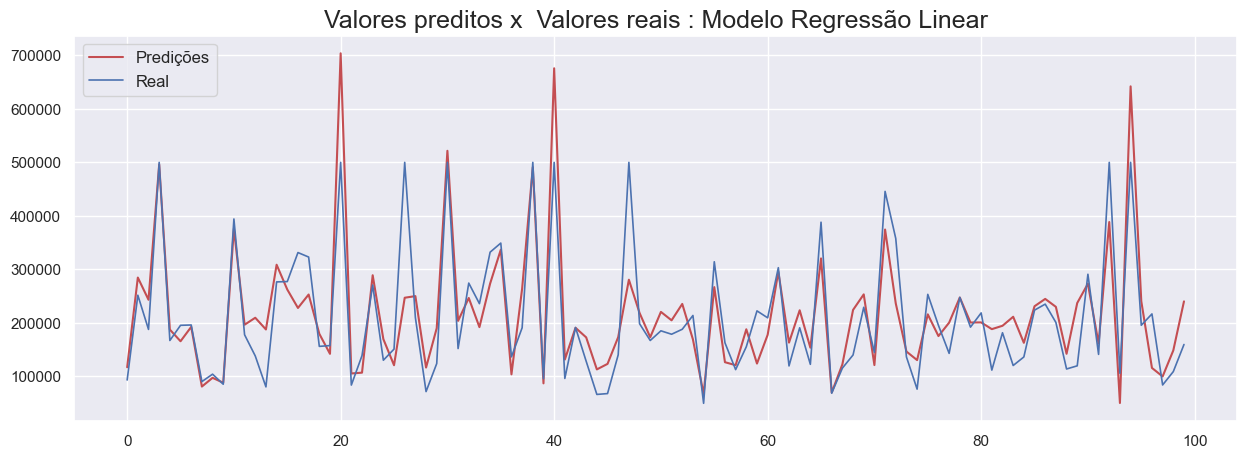

In [53]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(pred_regLinear[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais : Modelo Regressão Linear',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo LinearRegression() com dados normalizados StandardScaler()

In [54]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [55]:
#initantiate the linear regression
rLinear = LinearRegression()
#fit the model to the training data (learn the coefficients)
rLinear.fit(X_train_scaler,y_train)
#predict on the test data
y_pred_scaler = rLinear.predict(X_test_scaler)

#### VISUALIZANDO OS RESULTADOS

In [56]:
#intercept
iRL = (rLinear.intercept_)
print("Intercept: "+str(iRL))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_scaler[:3]}')
#Mean absolute error
maeRL = mean_absolute_error(y_test, pred_regLinear)
print('Erro absoluto médio (MAE): %.2f' % maeRL)
#Mean squared error
mRL = mean_squared_error(y_test, y_pred_scaler)
print('Erro quadrado médio (MSE): %.2f' % mRL)
# R2
r2RL = r2_score(y_test, y_pred_scaler)
print('R2: %.6f' % r2RL)

Intercept: 212602.359926173
Predição amostra de 3: [115698.35992617 286266.35992617 244906.35992617]
Erro absoluto médio (MAE): 47739.26
Erro quadrado médio (MSE): 4371231187.00
R2: 0.670319


##### VALIDAÇÃO DO MODELO 2: CrossValidation

In [57]:
cv_score = np.sqrt(-cross_val_score(rLinear,X_test_scaler,y_pred_scaler,cv=5,scoring='neg_mean_squared_error'))
cv1RL = cv_score.mean()
cv2RL = cv_score.std()
print("Média: %.6f" %cv1RL)
print("Desvio Padrão: %.6f" %cv2RL)
print("Shape:",pred_regLinear.shape)
print("Scores neg_mean_squared_error: ",cv_score)

Média: 421.883571
Desvio Padrão: 172.263135
Shape: (6130,)
Scores neg_mean_squared_error:  [398.2206255  754.48225539 330.61462606 262.19900843 363.90134009]


In [58]:
y_test = np.array(y_test)

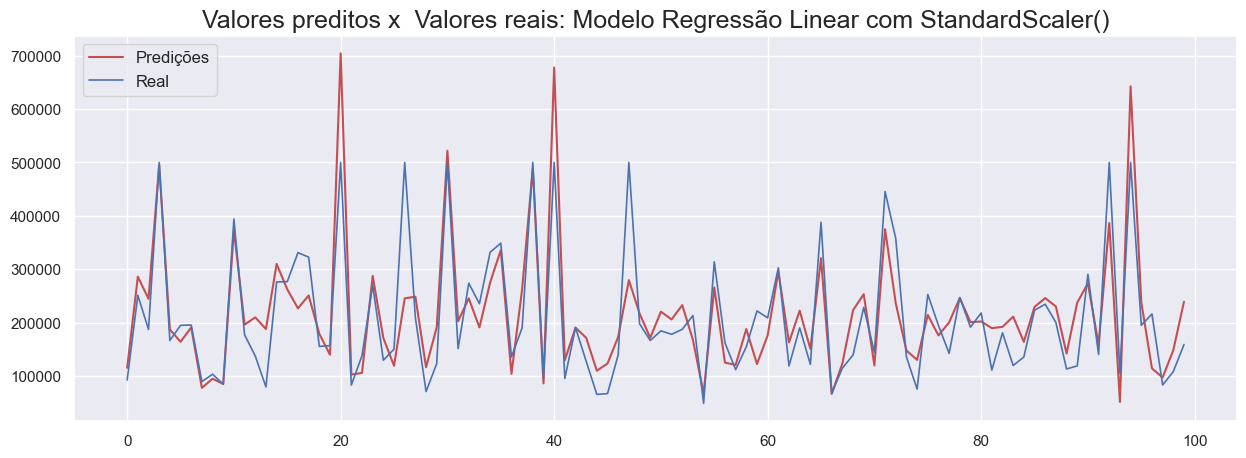

In [59]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_scaler[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Modelo Regressão Linear com StandardScaler()',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo LinearRegression() com dados normalizados PolynomialFeatures()


In [60]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [61]:
#initantiate the linear regression
rLinear_poly = LinearRegression()
#fit the model to the training data (learn the coefficients)
rLinear_poly.fit(X_train_poly,y_train)
#predict on the test data
y_pred_poly = rLinear_poly.predict(X_test_poly)

#### VISUALIZANDO OS RESULTADOS

In [62]:
#intercept
iRLpoly = (rLinear_poly.intercept_)
print("Intercept: "+str(iRLpoly))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_poly[:3]}')
#Mean absolute error
maeRLpoly = mean_absolute_error(y_test, y_pred_poly)
print('Erro absoluto médio: %.2f' % maeRLpoly)
#Mean squared error
mRLpoly = mean_squared_error(y_test, y_pred_poly)
print('Erro quadrado médio: %.2f' % mRLpoly)
# R2
r2RLpoly = r2_score(y_test, y_pred_poly)
print('R2: %.6f' % r2RLpoly)

Intercept: -43579440.836675376
Predição amostra de 3: [126531.94284682 289713.19067656 223451.23135211]
Erro absoluto médio: 41742.44
Erro quadrado médio: 3566316413.63
R2: 0.731026


##### VALIDAÇÃO DO MODELO 3: CrossValidation

In [63]:
cv_score = np.sqrt(-cross_val_score(rLinear_poly,X_test_poly,y_pred_poly,cv=5,scoring='neg_mean_squared_error'))
cv1RLpoly = cv_score.mean()
cv2RLpoly = cv_score.std()
print("Média: %.6f" %cv1RLpoly)
print("Desvio Padrão: %.6f" %cv2RLpoly)
print("Shape:",y_pred_poly.shape)
print("Scores: ",cv_score)

Média: 0.000213
Desvio Padrão: 0.000065
Shape: (6130,)
Scores:  [2.92319316e-04 2.25218916e-04 2.24576073e-04 2.30526267e-04
 9.40416401e-05]


In [64]:
y_pred_poly = np.array(y_pred_poly)
y_test = np.array(y_test)

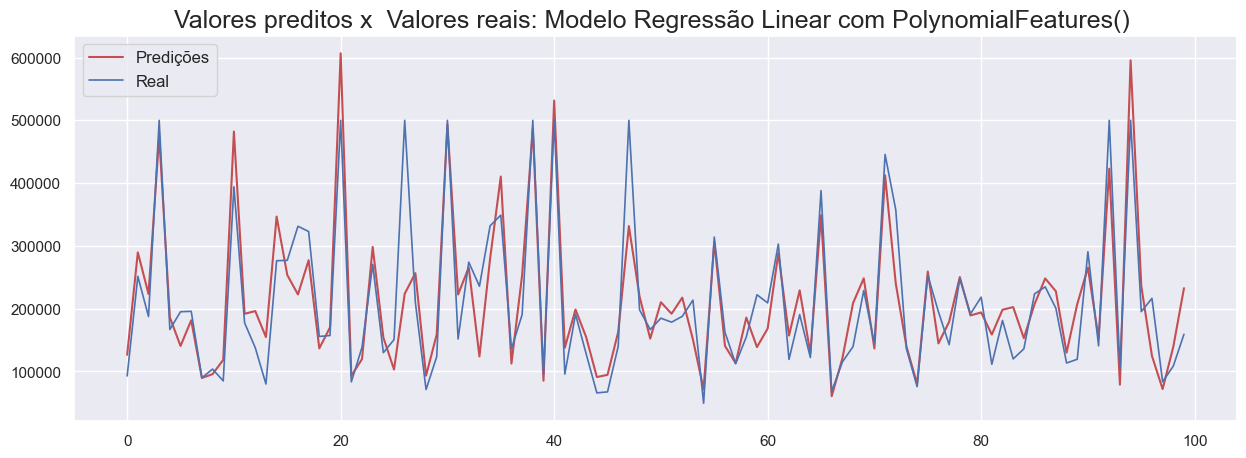

In [65]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_poly[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Modelo Regressão Linear com PolynomialFeatures() ',size=18)
plt.legend(['Predições','Real'],fontsize=12)
plt.show()

### Modelo RandomForestRegressor()

In [66]:
forest_reg = RandomForestRegressor(n_estimators=20,random_state=10)
forest_reg.fit(X_train , y_train)
y_pred_forest = forest_reg.predict(X_test)

In [98]:
#intercept
#não possui intercepr
iRF = 0
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_forest[:3]}')
#Mean absolute error
maeRF = mean_absolute_error(y_test, y_pred_forest)
print('Erro absoluto médio (MAE): %.2f' % maeRF)
#Mean squared error
mRF = mean_squared_error(y_test, y_pred_forest)
print('Erro quadrado médio (MSE): %.2f' % mRF)
# R2
r2RF = r2_score(y_test, y_pred_forest)
print('R2: %.6f' % r2RF)


Predição amostra de 3: [134405. 280730. 200510.]
Erro absoluto médio (MAE): 32474.43
Erro quadrado médio (MSE): 2482486798.60
R2: 0.812769


##### VALIDAÇÃO DO MODELO 4: CrossValidation

In [68]:
cv_score = np.sqrt(-cross_val_score(forest_reg,X_test,y_pred_forest,cv=5,scoring='neg_mean_squared_error'))
cv1RF = cv_score.mean()
cv2RF = cv_score.std()
print("Média: %.6f" %cv1RF)
print("Desvio Padrão: %.6f" %cv2RF)
print("Shape:",y_pred_forest.shape)
print("Scores: ",cv_score)

Média: 24896.112822
Desvio Padrão: 1113.859217
Shape: (6130,)
Scores:  [23608.04064541 23938.13445054 26747.82664304 24848.36846897
 25338.19390092]


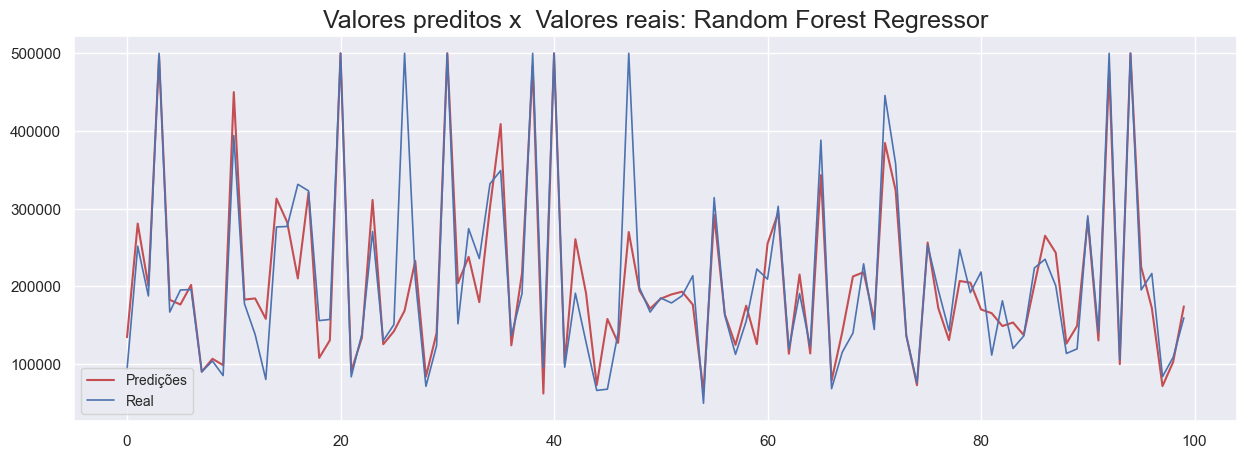

In [69]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(y_pred_forest[:100], linewidth=1.5, color='r')
plt.plot(y_test[:100], linewidth=1.2,color='b')
plt.title('Valores preditos x  Valores reais: Random Forest Regressor',size=18)
plt.legend(['Predições','Real'],fontsize=10)
plt.show()

### COMPARAÇÃO DOS RESULTADOS

In [115]:
#RESULTADOS
models = ['LinearRegression()', 'LR/StandardScaler()', 'LR/PolynomialFeatures()', 'RandomForestRegressor()']
intercept = [iRG, iRL, iRLpoly, iRF]
r2 = [r2RG, r2RL, r2RLpoly,r2RF]
MSE = [mRG, mRL, mRLpoly, mRF]
MAE = [maeRG, maeRL, maeRLpoly, maeRF]
cvMean = [cv1RG, cv1RL, cv1RLpoly, cv1RF ]
cvStd = [cv2RG, cv2RL, cv2RLpoly, cv2RF]

In [116]:
df_comp = pd.DataFrame(list(zip(models,intercept,r2,MSE,MAE,cvMean,cvStd )), columns=['Models', 'intercept', 'R2','MSE', 'MAE', 'cvMean','cvStd'])

In [119]:
from decimal import Decimal
df_comp['intercept'] = df_comp['intercept'].map(lambda x: "{:.2f}".format(x))
df_comp['R2'] = df_comp['R2'].map(lambda x: round(x,4))
df_comp['MSE'] = df_comp['MSE'].map(lambda x: "{:.2f}".format(x))
df_comp['MAE'] = df_comp['MAE'].map(lambda x: round(x,2))
df_comp['cvMean'] = df_comp['cvMean'].map(lambda x: round(x,2))
df_comp['cvStd'] = df_comp['cvStd'].map(lambda x: round(x,2))

In [120]:
df_comp

,Models,intercept,R2,MSE,MAE,cvMean,cvStd
0,LinearRegression(),-2120234.97,0.6706,4367488393.46,47739.26,0.00,0.00
1,LR/StandardScaler(),212602.36,0.6703,4371231187.00,47739.26,421.88,172.26
2,LR/PolynomialFeatures(),-43579440.84,0.7310,3566316413.63,41742.44,0.00,0.00
3,RandomForestRegressor(),0.00,0.8128,2482486798.60,32474.43,24896.11,1113.86


In [122]:
# Com base nos modelos aplicados, o modelo que tem os melhores resultados foi a RandomForestRegressor. 
#Neste modelo não foram ajustadas as variáveis com StandardScaler ou PolynomialFeatures. 

# O R2 foi 81,28%  # Média valor das casas R$ 24.896,11 
#Desvio Padrão da média do valor das casas R$ 1113,86
#Erro quadrado médio MSE  foi R$ 2.482.486.798,60
#Erro quadrado absoluto (MAE) foi R$ 32.474,43